# 21 Working with Web Coverage Services

The Web Coverage Service (WCS) is a standard issued by the Open Geospatial Consortium (OGC). It is designed to simplify remote access to coverages, commonly known as raster maps in GIS. WCS functions over the HTTP protocol, setting out how to obtain data and meta-data using the requests available in that protocol. In practice it allows raster maps to be obtained from a web browser or from any other programme that uses the protocol.

Source: https://www.isric.org/web-coverage-services-wcs

<img src="../images/tutorial21_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/21_working_with_web_coverage_services/'

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Loading the WCS Service and loading WMS Data

For this example, the digital elevation model of the State of Northrhine Westfalia will be downloaded. More information and the license for using the data can be found [here](https://www.bezreg-koeln.nrw.de/brk_internet/geobasis/hoehenmodelle/gelaendemodell/index.html).

### Loading the WCS Service
The WCS Server is being accessed via OWSLib. The attributes `url` and `version` are needed for the following request.

In [2]:
wcs_url = 'https://www.wcs.nrw.de/geobasis/wcs_nw_dgm'
wcs = gg.web.load_wcs(url=wcs_url)
print(type(wcs))
wcs

<class 'owslib.coverage.wcs201.WebCoverageService_2_0_1'>


In [3]:
wcs.url

'https://www.wcs.nrw.de/geobasis/wcs_nw_dgm'

In [4]:
wcs.version

'2.0.1'

### Load WMS Layer and Map

A map of the Aachen area is loaded to later on plot the downloaded Digital Elevation Model data.

In [5]:
wms = gg.web.load_wms('https://ows.terrestris.de/osm/service?')

In [6]:
wms_map = gg.web.load_as_array('https://ows.terrestris.de/osm/service?',
                             'OSM-WMS', 'default', 'EPSG:25832', [290000, 300000,5624000,5634000], [2000, 2000], 'image/png')

### Plot WMS Data

Text(294500, 5629750, 'Aachen')

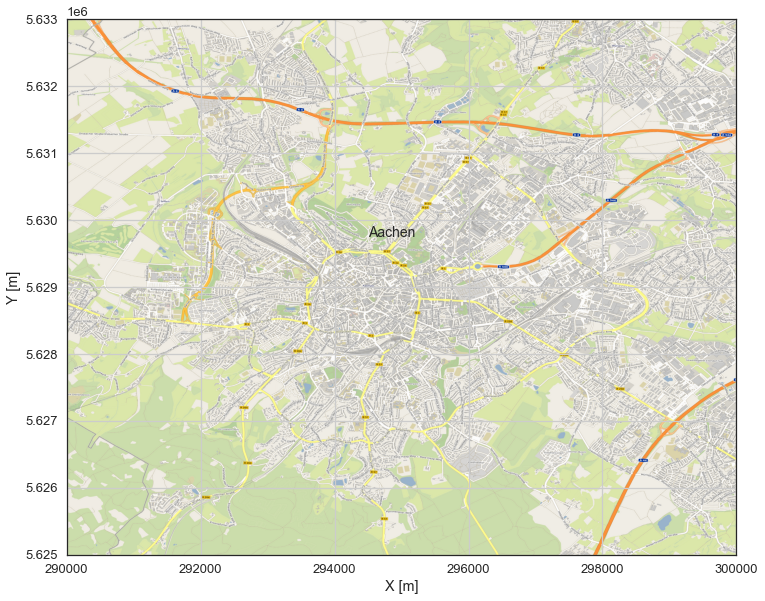

In [7]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (12,12))
plt.imshow(wms_map, extent= [290000, 300000,5625000,5633000])
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]')
plt.text(294500,5629750, 'Aachen', size = 14)

## Creating and Executing WCS Request

The WCS needs to be created by providing min and max values for X and Y locations. Here, a for loop is created to automatically download four tiles with an extent of 2 by 2 km each. Due to their size, they will be saved outside the repository. 

In [8]:
gg.web.load_as_files(wcs_url=wcs.url,
                     version=wcs.version,
                     identifier='nw_dgm',
                     form='image/tiff',
                     extent=[292000, 298000, 5626000, 5632000],
                     size=2000,
                     path=file_path,
                     create_directory=True)

TypeError: load_as_files() got an unexpected keyword argument 'create_directory'

## Create List of File paths

A list of file paths is created for the subsequent merging of the data.

In [ ]:
dem_fps = gg.raster.create_filepaths(dirpath=file_path, 
                                     search_criteria='tile*.tif')
dem_fps[:4]

## Create List of Tiles

The above created list of file paths is automatically being created when executing the function below. In addition, a list of the loaded tiles is created.

In [ ]:
src_files_to_mosaic = gg.raster.create_src_list(filepaths=dem_fps)
src_files_to_mosaic[:15]

## Merge tiles to mosaic

The single files can now automatically be merged to form a mosaic. In addition, the transform of the raster is being returned to save the raster later on.

In [ ]:
mosaic, transform = gg.raster.merge_tiles(src_files=src_files_to_mosaic)

In [ ]:
mosaic

In [ ]:
transform

## Safe Raster to disc

In [ ]:
import numpy as np
gg.raster.save_as_tiff(raster=np.flipud(mosaic), 
                       path=file_path +'raster.tif',
                       extent=[292000,298000,5626000,5632000], 
                       crs='EPSG:25832', 
                       transform=transform,
                       overwrite_file=True)

## Plot DEM

The mosaic/DEM can now be plotted using the built-in rasterio functionality or using matplotlib. 

In [ ]:
im = plt.imshow(mosaic, cmap='terrain', vmax=400, extent = [292000,298000,5626000,5632000])
plt.colorbar(im)

In [ ]:
plt.figure(figsize = (12,12))
plt.imshow(wms_map, extent= [290000, 300000,5625000,5633000])
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]')
plt.text(294500,5629750, 'Aachen', size = 14)
im = plt.imshow(mosaic, cmap='terrain', vmax=400, extent = [292000,298000,5626000,5632000])
plt.xlim(290000, 300000)
plt.ylim(5625000,5633000)